In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline 
plt.rcParams['figure.figsize'] = (15, 9)

In [3]:
dataset = pd.read_csv('vgsales.csv')

In [4]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# from above, we can see that 
#there are 271 NAN in Year column, 58 missing values in Publisher column


In [6]:
# To deal with missing values, here is two different methods:
# for Year, I use median data to fill the missing values;
# for Publisher, because the amount of missing values is 58, compared with total number: 16579,
# 58 is so small, so that delete these 58 rows;

In [7]:
# delete 58 rows with missing Publishers

In [8]:
dataset = dataset.dropna(subset=['Publisher'])

In [9]:
dataset.isnull().sum().sort_values(ascending=False).head()

Year            249
Global_Sales      0
Other_Sales       0
JP_Sales          0
EU_Sales          0
dtype: int64

In [10]:
# impute year column with median

In [11]:
dataset = dataset.fillna(dataset.median())

In [12]:
dataset.isnull().sum().sort_values(ascending=False).head()

Global_Sales    0
Other_Sales     0
JP_Sales        0
EU_Sales        0
NA_Sales        0
dtype: int64

In [13]:
dataset.count()

Rank            16540
Name            16540
Platform        16540
Year            16540
Genre           16540
Publisher       16540
NA_Sales        16540
EU_Sales        16540
JP_Sales        16540
Other_Sales     16540
Global_Sales    16540
dtype: int64

In [14]:
# From above, we can see that there is no missing values in dataset

In [15]:
# Now, consider the outliers

In [16]:
# define a function that can delete the rows where exits outliers, 
# using IQR method to detect the outliers

def outliers_iqr(dataset, col): 
    print(col)
    quartile_1, quartile_3 = np.percentile(dataset[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    dataset = dataset.drop(dataset[dataset[col] < lower_bound].index)
    dataset = dataset.drop(dataset[dataset[col] > upper_bound].index)
    return dataset

In [17]:
def outliers_all(dataset):
    list1 = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
    data = dataset
    for col in list1:
        data = outliers_iqr(data, col)
    return data

In [18]:
dataset = outliers_all(dataset)

NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


In [19]:
dataset.count()

Rank            10194
Name            10194
Platform        10194
Year            10194
Genre           10194
Publisher       10194
NA_Sales        10194
EU_Sales        10194
JP_Sales        10194
Other_Sales     10194
Global_Sales    10194
dtype: int64

In [20]:
# Now, test distribution of each column

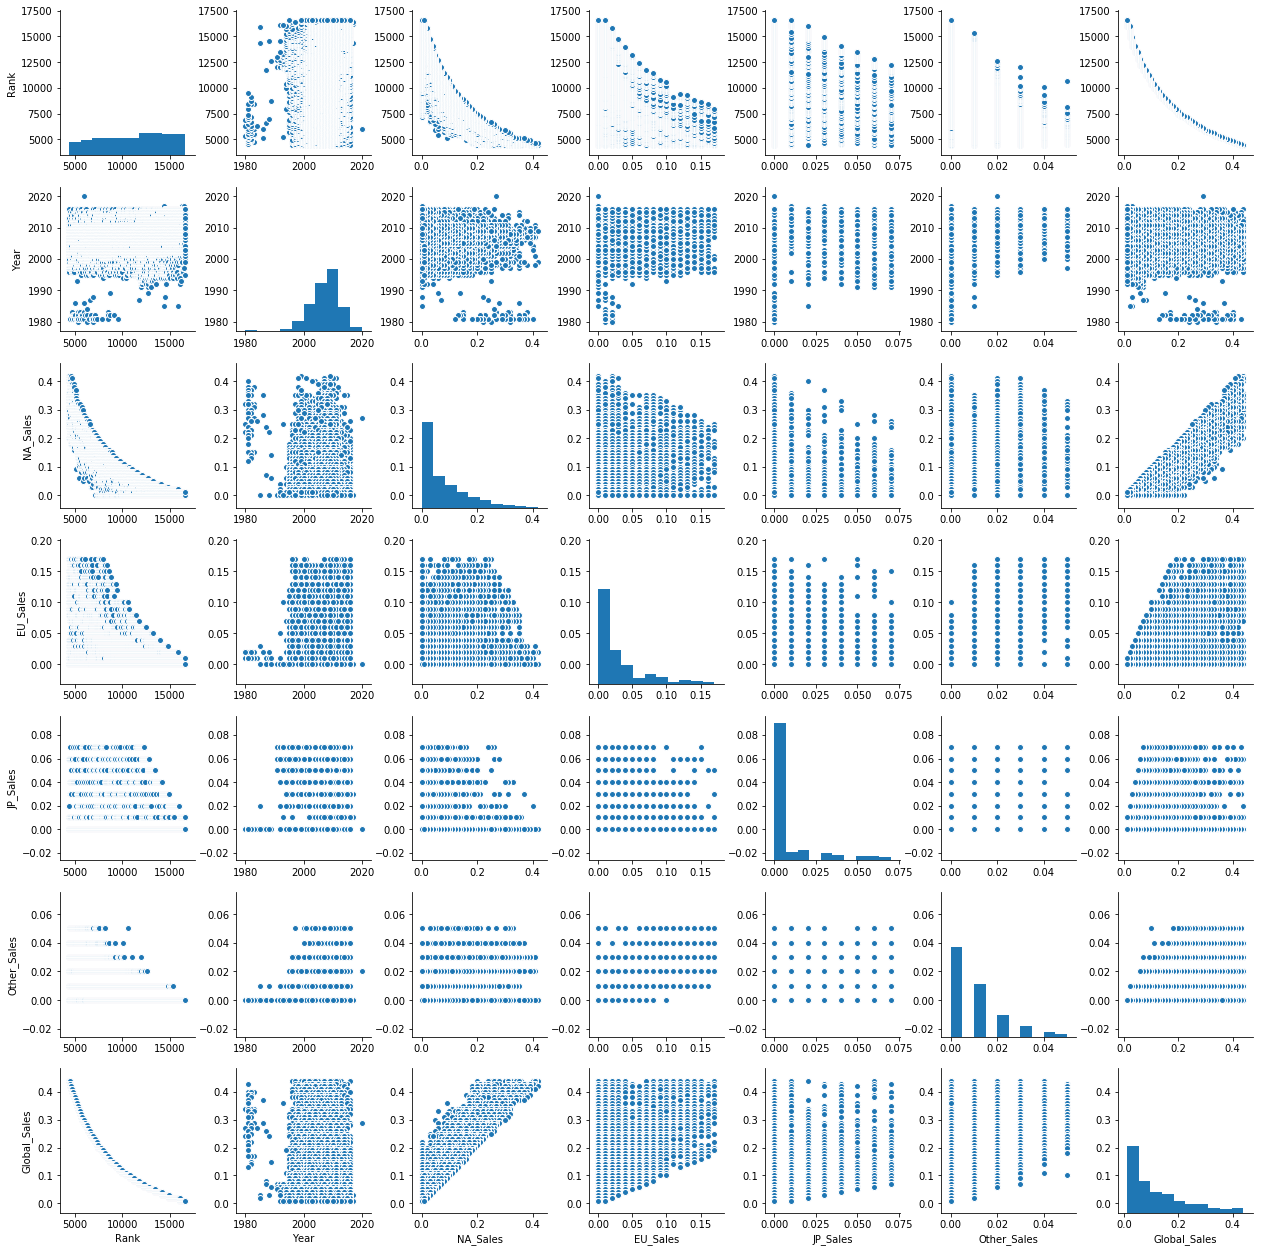

In [21]:
sns.pairplot(dataset)

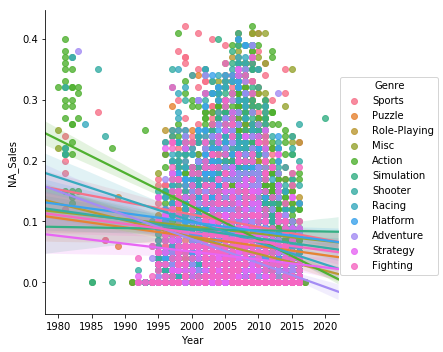

In [22]:
sns.lmplot(x="Year", y="NA_Sales", hue="Genre", data=dataset)

In [23]:
## I cannot see any pattern from above image, so that I prepare just consider the relationship
# between NA_SALES with year and platform

In [24]:
df_year = dataset.groupby(['Year'], as_index=False).sum()

In [25]:
df_year.head(10)

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,18585,0.79,0.05,0.00,0.00,0.85
1,1981.0,132819,5.65,0.32,0.00,0.00,6.05
2,1982.0,89603,3.70,0.23,0.00,0.00,3.96
3,1983.0,30195,1.43,0.09,0.00,0.00,1.53
4,1984.0,6298,0.26,0.01,0.00,0.00,0.27
5,1985.0,30208,0.00,0.03,0.02,0.01,0.05
6,1986.0,11042,0.63,0.04,0.00,0.00,0.66
7,1987.0,30054,0.38,0.01,0.00,0.00,0.41
8,1988.0,21451,0.22,0.03,0.00,0.01,0.27
9,1989.0,21397,0.20,0.01,0.00,0.00,0.21


In [26]:
sns.lmplot(x="Year", y="NA_Sales", data=df1)

NameError: name 'df1' is not defined

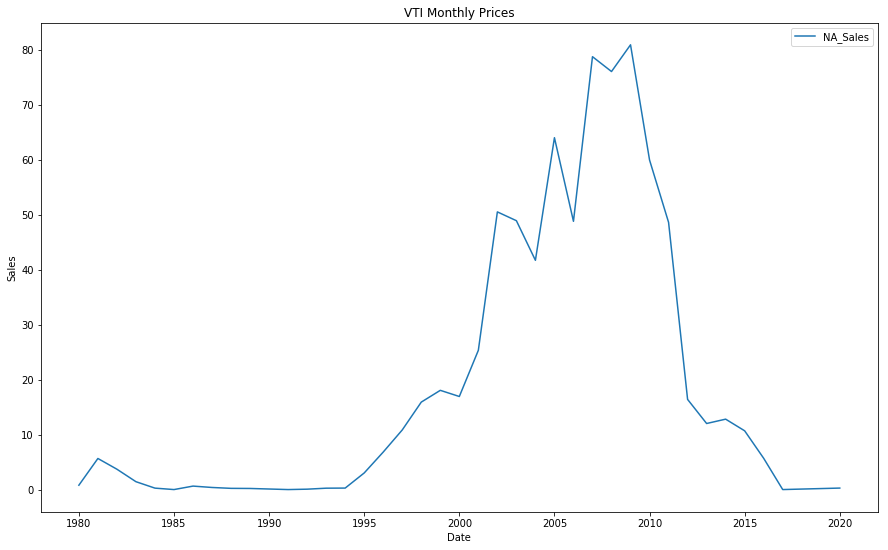

In [27]:
plt.plot(df_year["Year"], df_year["NA_Sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("VTI Monthly Prices")
plt.legend()
plt.show()

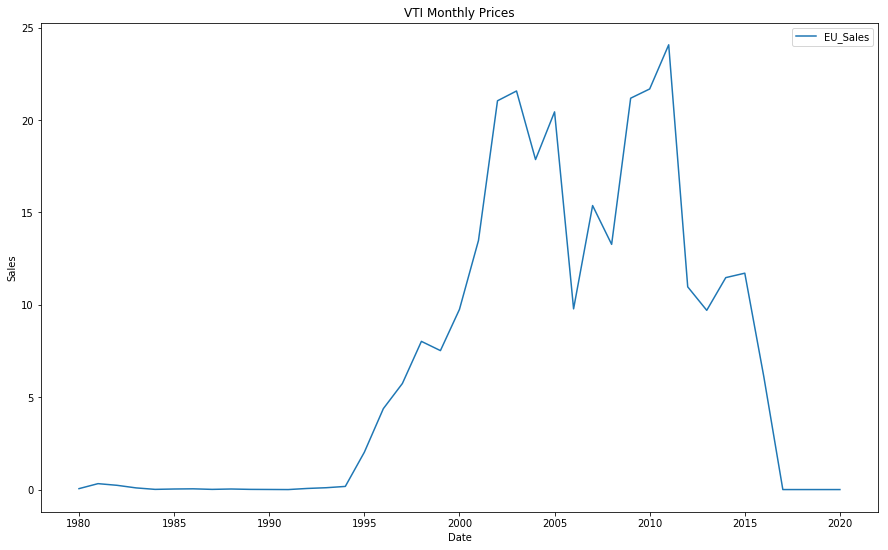

In [28]:
plt.plot(df_year["Year"], df_year["EU_Sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("VTI Monthly Prices")
plt.legend()
plt.show()

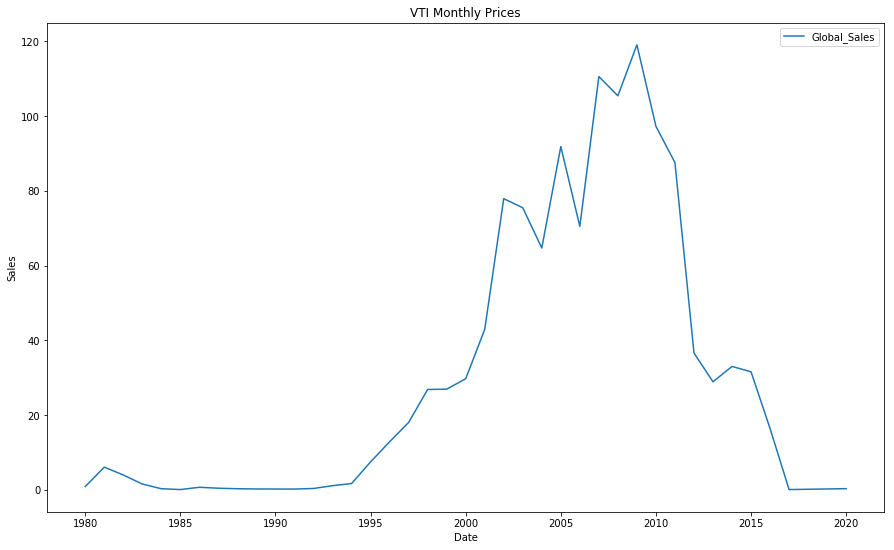

In [29]:
plt.plot(df_year["Year"], df_year["Global_Sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("VTI Monthly Prices")
plt.legend()
plt.show()

In [30]:
df_genre = dataset.groupby(['Genre'], as_index=False).sum()

In [31]:
df_genre

,Genre,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,21737300,4098298.0,166.48,68.12,15.84,19.99,271.43
1,Adventure,13316007,2077019.0,38.14,17.18,16.03,5.26,76.77
2,Fighting,4657741,862545.0,31.38,12.02,6.05,3.64,53.01
3,Misc,12261219,2268621.0,93.64,27.59,8.94,10.48,141.31
4,Platform,5124687,996607.0,45.22,17.48,1.71,4.44,69.13
5,Puzzle,4940135,832817.0,26.86,7.30,1.68,2.41,38.67
6,Racing,8723002,1646292.0,67.55,29.69,1.67,7.85,107.16
7,Role-Playing,8396652,1453813.0,37.80,16.64,13.86,5.66,74.14
8,Shooter,8101351,1506459.0,58.97,26.29,2.44,7.28,95.57
9,Simulation,6247242,1132190.0,48.47,12.41,3.20,5.13,69.47


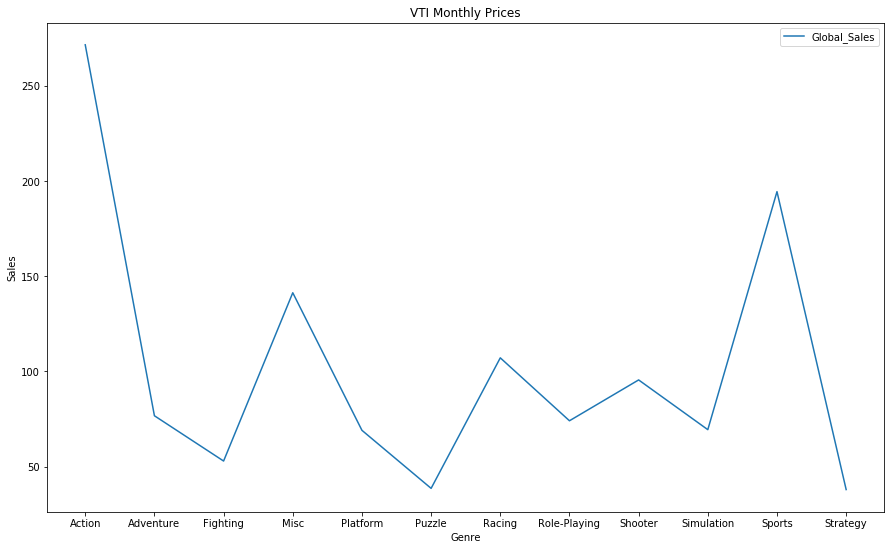

In [32]:
plt.plot(df_genre["Genre"], df_genre["Global_Sales"])
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.title("VTI Monthly Prices")
plt.legend()
plt.show()

In [33]:
# from above, we can see that Action game is the most popular game
# so that next I consider the relationship between action game with year and sales

In [38]:
df2 = dataset.groupby(['Year', 'Genre'], as_index=False).sum()

In [41]:
df3 = df2.drop(df2[df2['Genre'] != 'Action'].index)

In [44]:
df3.describe()

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,32.00000,3.200000e+01,32.000000,32.000000,32.00000,32.000000,32.000000
mean,2000.46875,6.792906e+05,5.202500,2.128750,0.49500,0.624688,8.482187
std,10.98675,6.867610e+05,5.365739,2.052493,0.71007,0.728786,8.199687
min,1980.00000,5.368000e+03,0.000000,0.000000,0.00000,0.000000,0.010000
25%,1993.75000,4.157500e+04,0.785000,0.092500,0.00750,0.000000,0.990000
50%,2001.50000,3.447955e+05,3.300000,1.725000,0.15000,0.275000,5.485000
75%,2009.25000,1.298122e+06,9.060000,3.860000,0.81750,1.057500,14.287500
max,2017.00000,2.296204e+06,17.760000,6.260000,2.72000,2.260000,25.290000


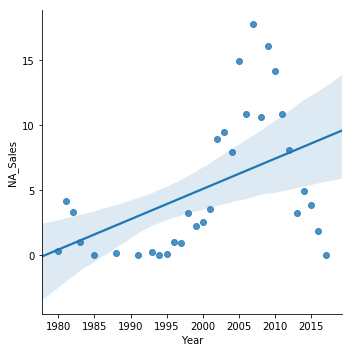

In [43]:
sns.lmplot(x="Year", y="NA_Sales", data=df3)

In [ ]:
# from above, the relationship between year and NA_SALES in action game is not liner regression